### LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

<br/><br/>
<br/><br/>
<br/><br/>

# QUESTION 1
## Warmup - Approximations

### CODE

In [15]:
#UNCLEAR WHAT WE'D USE HERE...
#MAJOR THEME OF THIS LAB IS HOW SIMPLE MATHEMATICAL MODELS PROVIDE GOOD APPROXIMATIONS FOR MORE COMPLEX ONES

### SHORT RESPONSE

<br/><br/>
<br/><br/>
<br/><br/>  

# QUESTION 2  
## THE PROVERBIAL PARTICLE IN A BOX
CODE:
* Using the empty function, fill in the missing part with the formula of the particle in a box wavefunction.  
* Display the first 5 harmonics of the Particle in a Box using the given function, which will call your function.
  
SHORT RESPONSE:
* What do you think the particle in a box wavefunction will look like as n goes to infinity?  
* What does this mean, if the square of a wavefunction is a probability density?  

### GIVEN FUNCTIONS

In [5]:
def plot_wavefunction(n, L=1, resolution=1000):
    """
    Plot wavefunctions for a particle in a 1D box.
    
    Parameters:
        n (int): quantum number to plot.
        L (float): Length of the box (meters).
        resolution (int): Number of points for plotting.
    """
    x = np.linspace(0, L, resolution)
    plt.figure(figsize=(5, 3))
    
    psi = pib_wavefunction(x,n,L)
    plt.plot(x, psi, label=f'n={n}')

    plt.xlim(0,L)
    plt.title(f'Particle in a 1D Box (n == {n})')
    plt.xlabel('Position (m)')
    plt.ylabel('Wavefunction')
    plt.legend()
    plt.grid()
    plt.show()

### CODE

In [6]:
def pib_wavefunction(x,n,L):
    '''
    accepts:
    an array, x
    the quantum number, n
    the length of the box in angstrom, L
    '''
    psi = np.sqrt(2 / L) * np.sin(n * np.pi * x / L)
    return psi

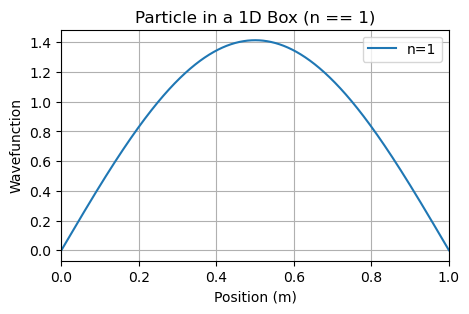

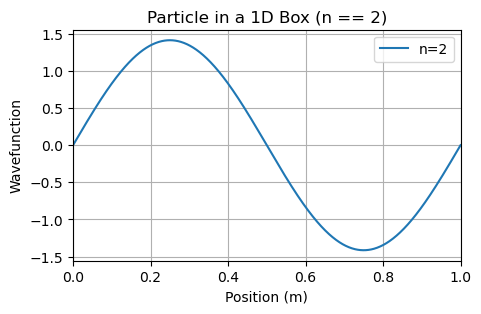

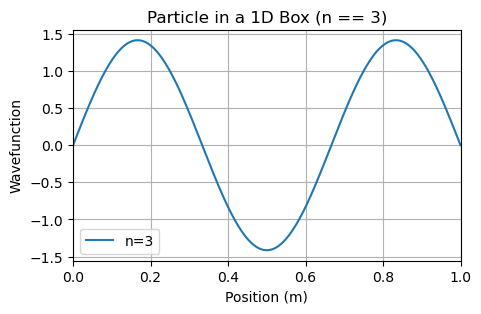

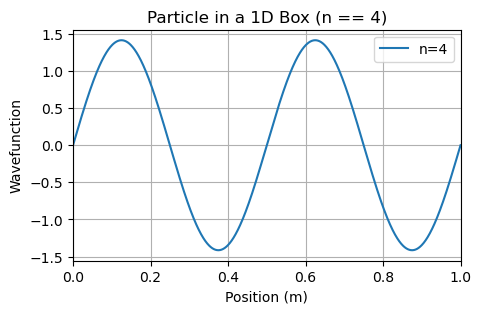

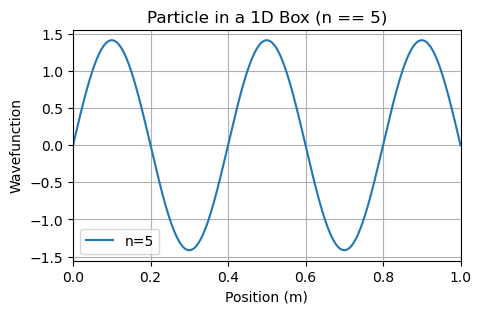

In [7]:
plot_wavefunction(1)
plot_wavefunction(2)
plot_wavefunction(3)
plot_wavefunction(4)
plot_wavefunction(5)

### SHORT RESPONSE

As the quantum number n goes to infinity, the particle in a box wavefunction will approximate a rectangle instead of being obviously a wave. If the square of wavefunction is probability density, this means we would have an equal chance of finding the particle anywhere in the box.

<br/><br/>
<br/><br/>
<br/><br/>

# QUESTION 3
## ENERGY LEVELS OF THE PARTICLE IN A BOX
CODE:
* Fill in the pib_energy() function with an expression that calculates the energy of a given particle in a box wavefunction, based on n, L, and m_electron.
* Calculate and plot the energy levels for the first 5 quantum states of the particle in a box.  
* Fit a quadratic function to your data.

SHORT RESPONSE:  
* What is the physical significance of the coefficients in the polynomial you fit? (treat very small values as being zero.)

### GIVEN FUNCTIONS

In [19]:
def find_r_squared(x,y,degree):
# Predicted values
    coeffs = np.polyfit(x,y,degree)
    y_pred = np.polyval(coeffs, x)

    # Compute the R-squared value
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

In [20]:
def plot_with_polynomial(n_vals,pib_energies):
    plt.scatter(n_vals,pib_energies)
    
    a, b, c = np.polyfit(n_vals,pib_energies,2)
    fit_x = np.linspace(n_vals[0],n_vals[-1],100)
    fit_y = a * fit_x **2 + b * fit_x + c

    r_squared = find_r_squared(n_vals,pib_energies,2)
    plt.plot(fit_x,fit_y,label=f"fit: {a:.3f} x**2 + {b:.3f} x + {c:.3f}  | R**2 : {r_squared:.3f}",color='red')
    
    plt.legend()
    plt.show()
    print()

### CODE

In [21]:
def pib_energy(n, L_angs=1.5):
    """
    USE ATOMIC UNITS...
    Calculate energy levels for a particle in a 1D box.
    
    Parameters:
        n (int):quantum number. 
        L_angs (float): Length of the box in angstrom.
        
    Returns:
        list: Energies in joules for quantum numbers 1 through n_max.
    """
    L_au = L_angs * 1.8889 
    h_au = 2 * np.pi # Planck's constant (J·s)
    m_electron_au = 1
    energy = (n**2 * h_au**2) / (8 * m_electron_au * L_au**2)
    return energy

In [22]:
n_vals = range(1,6)
pib_energies = []
for n in n_vals:
    pib_energies.append(pib_energy(n))
print(pib_energies)

[0.6147086131632408, 2.458834452652963, 5.5323775184691675, 9.835337810611852, 15.367715329081019]


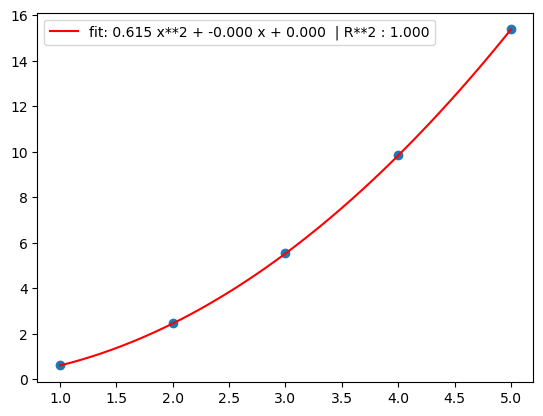

In [23]:
plot_with_polynomial(n_vals,pib_energies)

### SHORT RESPONSE

The equation for the energy levels of the particle in a box versus the quantum number n is quadratic in character.  
The coefficient A is the lowest allowed energy level of the particle in a box, which is equal to h^2 / (8 * m * L^2).

<br/><br/>
<br/><br/>
<br/><br/>
  

# QUESTION 4
## DIFFERENCES BETWEEN ENERGY LEVELS
CODE:
* Now, from that data, calculate first differences between each energy level and its next highest neighbor.  
* Use the provided function to fit a linear regression to these, and plot.
 
SHORT RESPONSE:
* What is the character of the energy differences? (linear, quadratic, logistic, etc)
* What does the expression mean?

### GIVEN FUNCTIONS

In [127]:
def first_differences(values):
    return [values[i + 1] - values[i] for i in range(len(values) - 1)]

In [128]:
def plot_with_regression(n_vals,first_differences):
    n_vals = n_vals[0:len(first_differences)]
    
    plt.scatter(n_vals,first_differences)
    
    m, b= np.polyfit(n_vals,first_differences,1)
    fit_x = np.linspace(n_vals[0],n_vals[-1],100)
    fit_y = m * fit_x + b
    plt.plot(fit_x,fit_y,label=f"fit: {m:.3f} x + {b:.3f}")
    
    plt.legend()
    plt.show()
    print()

### CODE

In [129]:
pib_fds = first_differences(pib_energies)

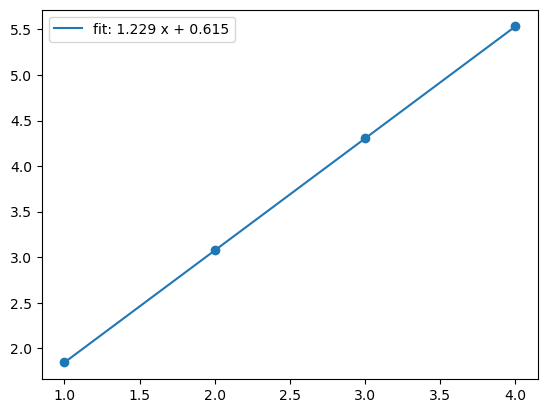

In [130]:
plot_with_regression(n_vals,pib_fds)

### SHORT RESPONSE

The expression is linear.  
This expression predicts the energy gap between the nth particle in a box energy level and the n+1 th energy level.

<br/><br/>
<br/><br/>
<br/><br/>

# QUESTION 5
## MAKING MOLECULES
CODE:
* Create SMILES strings for ethene, butadiene, hexatriene, and octatetraene.
* Create cartesian coordinates for each of these molecules and visualize them using the provided functions.

SHORT RESPONSE:
* How might it be useful to define molecules using strings of text?

### LIBRARIES

In [1]:
import psi4
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

### GIVEN FUNCTIONS

In [2]:
#PART 1: GETTING OUR MOLECULES
def xyz_from_smiles(smiles):
    rdkit_molecule = Chem.MolFromSmiles(smiles)
    rdkit_molecule = Chem.AddHs(rdkit_molecule)
    result = AllChem.EmbedMolecule(rdkit_molecule, randomSeed=42)
    if result != 0:
        raise ValueError("Embedding failed for the molecule")
    result = AllChem.MMFFOptimizeMolecule(rdkit_molecule)
    
    if result != 0:
        raise ValueError("Optimization failed for the molecule")
    
    xyz = Chem.MolToXYZBlock(rdkit_molecule)
    return xyz

In [3]:
def show_molecule(xyz):
    view = py3Dmol.view(width=400,height=400)
    view.addModel(xyz,'xyz')
    view.setStyle({'sphere':{'radius' : 0.3}, 'stick' : {'radius': 0.2}})
    view.setStyle({'element': 'H'}, {'sphere': {'radius': 0.3, 'color': 'white'}})
    view.zoomTo()
    view.show()

### CODE

In [4]:
ethylene_smiles = "C=C"
butadiene_smiles = "C=C" * 2
hexatriene_smiles = "C=C" * 3
octatetraene_smiles = "C=C" * 4

alkenes = ["C=C" * i for i in range(1,5)]
for alkene in alkenes:
    show_molecule(xyz_from_smiles(alkene))

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### SHORT RESPONSE

If we can define molecules as strings of text, then we can use all of Python's string manipulation capability to iterate through different molecules, create large molecules quickly, etc.
This system is also sometimes easier to use than clunky browser-based molecule editors.

<br/><br/>
<br/><br/>
<br/><br/>
  

# QUESTION 6  
## VISUALIZING MOLECULAR ORBITALS
CODE:
* Explore the $\pi$ molecular orbitals of decapentaene using the provided functions (Ground states and excited states are alike shown here).
* If fortecubeview doesn't immediately allow you to switch to a different orbital, be patient. This is normal.

SHORT RESPONSE:
* How do the shapes of the pi orbitals compare to the wavefunctions for the particle in a 1D box?

### LIBRARIES

In [5]:
import forte.utils
import fortecubeview

### GIVEN FUNCTIONS

In [6]:
def create_psi4_molecule(xyz_block):
    '''
    INPUT:
    xyz format molecule coordinates
    OUTPUT:
    psi4-compatible molecular geometry object
    '''
    xyz_lines = xyz_block.split('\n')
    psi_coords = "\n".join(["0 1"] + xyz_lines[2:])
    psi4_molecule = psi4.geometry(psi_coords)
    return psi4_molecule

### CODE

In [7]:
decapentaene_smiles = "C=C" * 5
decapentaene = create_psi4_molecule(xyz_from_smiles(decapentaene_smiles))
psi4.set_output_file('output.dat',False)
psi4.set_memory('1 GB')
my_theory = 'BLYP/STO-3G'
dec_energy, dec_wfn = psi4.energy(my_theory,return_wfn=True,molecule=decapentaene)

In [8]:
forte.utils.psi4_cubeprop(dec_wfn,path = 'cubes',nocc=8,nvir=8)

Preparing cube files for orbitals: 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44


In [9]:
view = fortecubeview.plot('cubes',colorscheme='wow')

CubeViewer: listing cube files from the directory cubes
Reading 16 cube files


HTML(value='\n        <style>\n           .jupyter-widgets-output-area .output_scroll {\n                heigh…

interactive(children=(Select(description='Cube files:', options=('MO   29a (29-A)', 'MO   30a (30-A)', 'MO   3…

### SHORT RESPONSE

The pi orbitals have the same node as the particle in box sine wave. In order, they go from zero, to one, to two, to three nodes. In this respect the orbitals are qualitatively similar to the particle in a box wavefunctions.

<br/><br/>
<br/><br/>
<br/><br/>

# QUESTION 7
## COMPARING PARTICLE IN A BOX ENERGIES TO EXTENDED ALKENE MOLECULAR ORBITALS
CODE:
* Make a list containing the indices of the ground state pi orbitals, based on your visualizations. (Hint: How many electrons are in the molecule? What is the index of the highest ground state orbital?)
* Fit a quadratic equation to the $\pi$ molecular orbital energies for hexatriene. (This is the functional form that we used for the particle in a box equation.)
* Next, extend that list to include the first few excited pi orbitals. Plot and fit the data again.

SHORT RESPONSE:
* How well does the quadratic equation, which we found to exactly match the particle in a box energies, predict the energies of ground state hexatriene $\pi$ orbitals?
* How about excited state orbitals?

### GIVEN FUNCTIONS
Use the plot_with_polynomial(x,y) function from earlier!

### CODE

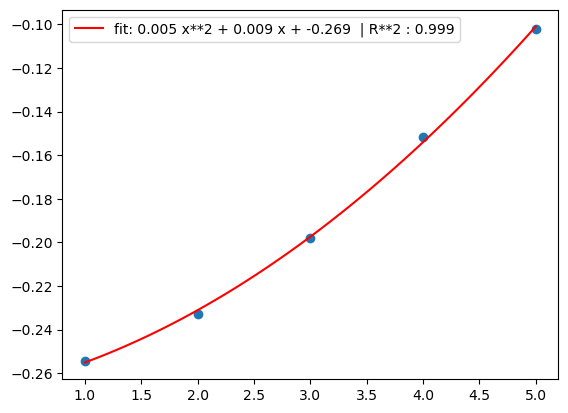

In [24]:
indices = [31,33,34,35,36] #FIND THE INDICES OF THE FIRST 5 PI ORBITALS
#WE MUST SUBTRACT ALL INDICES BY ONE, BECAUSE ORBITAL FILES COUNT FROM 1 AND PYTHON FROM ZERO
indices = np.array(indices) - 1
x = range(1,6)
y = dec_wfn.epsilon_a().np[indices] #epsilon_a() is orbital energies of wavefunction
#.np is these values in np.array format
plot_with_polynomial(x,y)

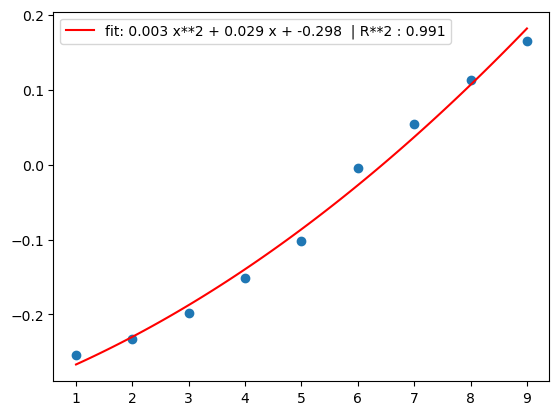

In [25]:
excited_indices = [37,38,39,40] #CHOOSE THESE
excited_indices = np.array(excited_indices) - 1
all_indices = np.concatenate((indices,excited_indices))
x = range(1,len(all_indices)+1)
y = dec_wfn.epsilon_a().np[all_indices]
plot_with_polynomial(x,y)

### SHORT RESPONSE

The alkene pi orbital energies calculated with density functional theory are extraordinarily well matched by the quadratic model that exactly fits the particle in a box energies. The $R^2$ value of 0.999 confirms this intuition.

The expression also works for at least the first few excited states ($R^2$ value of 0.991), but slightly overestimates occupied orbital energies and slightly underestimates virtual orbital energies.

<br/><br/>
<br/><br/>
<br/><br/>
  

# QUESTION 8  
## PREDICTING UV/VIS EXCITATION ENERGIES WITH THE PARTICLE IN A BOX MODEL
HOMO-LUMO energy gaps are a good predictor of the lowest energy peak in UV/VIS spectra. (Source: it was revealed to me in a dream)   

Compare the HOMO-LUMO energy gaps you calculate for n=2,4,6,8,10 alkenes with the value predicted by the particle in a box model. 

CODE:
* Write comments for each of the given functions explaining what they do and how they work.
* Complete the functions for alkene lengths and for the PIB-predicted HOMO-LUMO energy gap.
* Use the provided functions to obtain y values for the PIB and DFT models and plot your data.

SHORT RESPONSE:
* How similar or different are they?

### GIVEN FUNCTIONS

In [26]:
def pib_harmonics(n): #gives us the PIB indices corresponding to HOMO and LUMO
    n = np.array(n)
    return (n / 2).astype(int), (n / 2 + 1).astype(int) #returns nth and n+1th index (works for arrays)

In [27]:
def homo_lumo_energy_gap(n):  #calculates HOMO-LUMO energy gap for alkene chain n-carbons long
    smiles = "C=C" * int(n/2) #create the molecule for the n-long chain
    molecule = create_psi4_molecule(xyz_from_smiles(smiles)) #create the molecule for the calculation
    energy, wfn = psi4.energy('BLYP/STO-3G',return_wfn=True,molecule=molecule) #calculate energy and wavefunction
    lumo_index = int(wfn.nalpha()) #set lumo index to number of spin-up electrons 
    homo_index = lumo_index -1 #set homo index to one less than lumo
    hl_energy_gap = wfn.epsilon_a().np[lumo_index] - wfn.epsilon_a().np[homo_index] #calculate energy gap
    return hl_energy_gap #return energy gap

In [28]:
def get_alkene_gaps(n): #gets whole list of alkene energy gaps up to n
    x = np.array(range(6,n+1,2)) #make array of n values, starting from 6 up to n, separated by 2
    y_alkene = [] #make list to store our things in
    for i in x:
        y_alkene.append( homo_lumo_energy_gap(i) ) #for each n value, calculate a gap and store it in list
    y_alkene = np.array(y_alkene) #change list to array so we can do math on it
    return y_alkene #return array of values

In [29]:
def get_pib_gaps(n): #gets whole list of pib energy gaps
    x = np.array(range(6,n+1,2)) #same as last function
    y_pib = []
    for i in x:
        y_pib.append( pib_energy_gap(i) )
    y_pib = np.array(y_pib)
    return y_pib

In [30]:
def plot_data(n,y_alkene,y_pib): #function for plotting data
    x = np.array(range(6,n+1,2)) #make x array appropriate for max n

    plt.scatter(x,y_pib) #put x and y data in a scatter plot
    plt.title('PIB GAPS') #set various labels on graph
    plt.xlabel('Chain length')
    plt.ylabel('Energy / au')
    plt.show()

    plt.scatter(x,y_alkene) #same as top one
    plt.title('DFT GAPS')
    plt.xlabel('Chain Length')
    plt.ylabel('Energy / au')
    plt.show()

### CODE

In [31]:
def alkene_length(n):
    #Use angstroms!
    return 1.2 * (n - 1)

In [32]:
def pib_energy_gap(n):
    hi, li = pib_harmonics(n)
    L = alkene_length(n)
    pib_homo_e = pib_energy(hi,L)
    pib_lumo_e = pib_energy(li+1,L)
    delta_e = pib_lumo_e - pib_homo_e 
    return delta_e

In [33]:
pib_gaps = get_pib_gaps(18)

In [34]:
alkene_gaps = get_alkene_gaps(18)

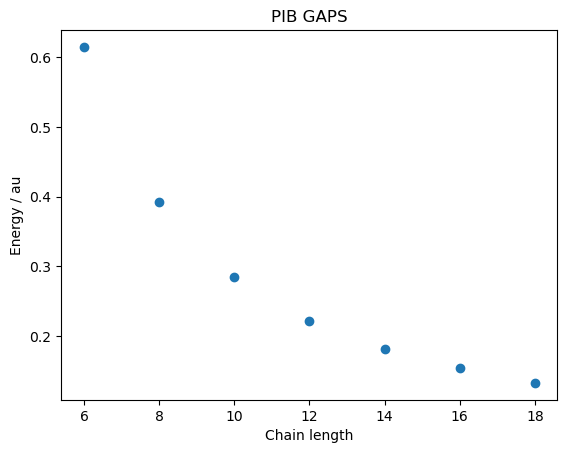

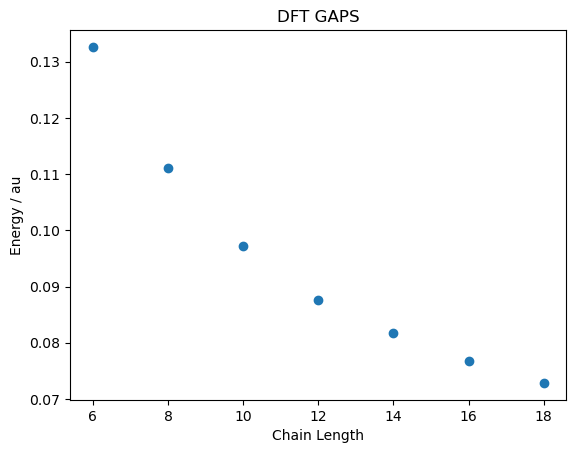

In [35]:
plot_data(18,alkene_gaps,pib_gaps)

### SHORT RESPONSE

They appear to have a very similar shape, but their scales and locations on the y axis are too different for the PIB model to predict the computed gaps in its current form.

<br/><br/>
<br/><br/>
<br/><br/>

# QUESTION 9
## IMPROVING THE MODEL
CODE:
* Complete the function for a modified PIB model with two parameters, A and B, which are a proportionality and constant correction.
* Use scipy.optimize.curve_fit() to calculate the optimal parameters for fitting the modified PIB model to density functional theory data. 
* Using the provided function and the parameters you obtained, plot your output.

SHORT RESPONSE:
* How well does the modified PIB equation predict HOMO-LUMO gaps with these corrections?

### LIBRARIES

In [152]:
from scipy.optimize import curve_fit

### GIVEN FUNCTIONS

In [153]:
def pib_r_squared(x,y,coeffs):
# Predicted values
    y_pred = corrected_pib_model(x,*coeffs)
    # Compute the R-squared value
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

In [154]:
def pib_fit_plot(x,y,coeffs):
    x = np.array(range(6,19,2))
    y_fit = corrected_pib_model(x,*params)
    plt.scatter(x,y)
    r_squared = pib_r_squared(x,y,params)
    plt.plot(x,y_fit,color='red',
             label=f"Model: {params[0]:.2f} * pib_energy_gap(n) + {params[1]:.2f} | R**2: {r_squared:.3f}"
            )
    plt.legend()
    plt.show()
    print(f"Parameters: {params[0]:.2f} {params[1]:.2f}")

### CODE

In [155]:
def corrected_pib_model(n, A, B):
    return A * pib_energy_gap(n) + B

In [156]:
params, covariance = curve_fit(corrected_pib_model,np.array(range(6,19,2)),alkene_gaps)

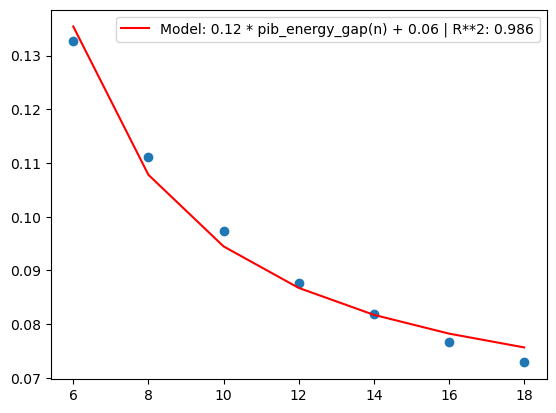

Parameters: 0.12 0.06


In [157]:
pib_fit_plot(np.array(range(6,19,2)),alkene_gaps,params)

### SHORT RESPONSE

The HOMO-LUMO energy gaps predicted by the particle in a box equations actually quite closely match the energies predicted by complex computational methods, provided we apply a proportionality and constant correction. We get an R**2 value above 0.98.

<br/><br/>
<br/><br/>
<br/><br/>
  

# QUESTION 10
## REFLECTION
How well do qualitative or simplified models match the results of more rigorous models?   
What are the advantages and disadvantages of each?  
Are both useful tools, or only one?  
When would we use one or the other?  

### SHORT RESPONSE

The qualitative models actually match the rigorous models quite closely.  
The advantage of the more rigorous computational models is that they capture fine details that the qualitative models miss, and sometimes these fine details completely control the important property you're studying.  
The simple models offer heuristic power; they can be run in a human brain instead of a supercomputer and give us a good first guess for making decisions. They can also be run on that supercomputer at greatly reduced cost for large-scale calculations.  
Both have their place; they serve different needs.  
We would use the rigorous models when studying new or poorly understodd phenomena. We might even develop qualitative theories based on a rigorous computational exploration of a novel system.

<br/><br/>
<br/><br/>
<br/><br/>
  

# CLEANUP
Earlier in the excercise, we generated nearly a gigabyte of orbital data. Here is where we delete that.

In [158]:
import shutil
shutil.rmtree('cubes') #clean up the gigabyte of orbital data when you're done!

<br/><br/>
<br/><br/>
<br/><br/>